<a href="https://colab.research.google.com/github/marielnr/Addressing-Mising-Data/blob/main/Address_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Which companies should we invest in?
### Primary obstacle: Addressing missing data

"About Dataset:

Private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns."
####Madbhat, M. S. (2021). Unicorn companies [Dataset]. Kaggle. https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies


```
# Tiene formato de código
```



## Background

This notebook will help decide which future companies to invest in, you will see a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns."

The investor has asked you to provide them with the following data:
- Companies in the `hardware` industry based in `Beijing`, `San Francisco`, and `London`
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom`

The dataset includes a list of businesses and data points, such as the year they were founded, their industry, and their city, country, and continent.

In [7]:
# Import libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [8]:
df_companies = pd.read_csv('Unicorn_Companies.csv')

In [9]:
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [10]:
df_companies.shape

(1074, 10)

In [11]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [12]:
df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [13]:
df_companies['Year_Joined'] = pd.to_datetime(df_companies['Date Joined']).dt.year

In [14]:
def str_to_num(x):
    x = x.strip('$B')
    x = int(x)

    return x

In [15]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

### YOUR CODE HERE ###
df_companies['valuation_num'] = df_companies['Valuation'].apply(str_to_num)
df_companies[['Valuation', 'valuation_num']].head()

,Valuation,valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


### Find missing values

The unicorn companies dataset is fairly clean, with few missing values.

In [16]:
df_companies.isna().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,16
Country,0
Continent,0
Year Founded,0
Funding,0
Select Investors,1


### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled.

In [17]:
mask = df_companies.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
mask = mask.any(axis=1)
mask.head()

,0
0,False
1,False
2,False
3,False
4,False


In [19]:
df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


## Step 3: Model building


In [20]:
count_total = df_companies.size
count_total

12888

In [21]:
count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

In [22]:
count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

In [23]:
row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')
col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')


Percentage removed, rows: 1.583
Percentage removed, columns: 16.667


In [24]:
df_companies_backfill = df_companies.fillna(method='backfill')
df_companies_backfill.iloc[df_missing_rows.index, :]

/tmp/ipython-input-4132400771.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_companies_backfill = df_companies.fillna(method='backfill')


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


In [25]:
cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
) | (
    (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
)

df_invest = df_companies[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,2021-11-10,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,2015-06-02,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,2021-06-16,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


### List of countries by sum of valuation

In [27]:
national_valuations = df_companies.groupby(['Country'])['valuation_num'].sum(
).sort_values(ascending=False).reset_index()

national_valuations.head(15)


,Country,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


### Filter out top 4 outlying countries

In [28]:
mask = ~national_valuations['Country'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### Barplot for top 20 non-big-4 countries

Top 20 non-big-4 countries with the highest total company valuations.

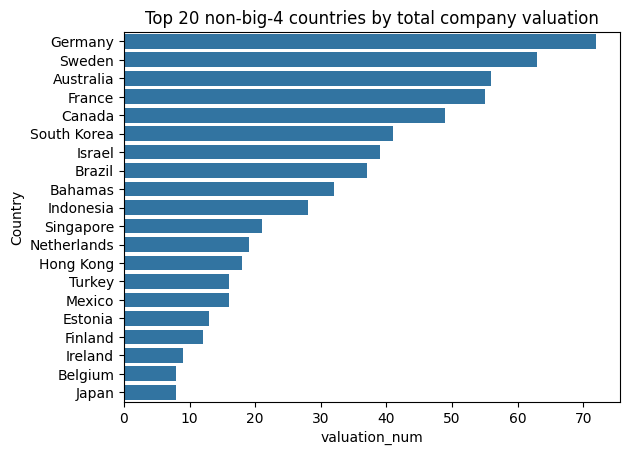

In [29]:
sns.barplot(data=national_valuations_no_big4.head(20),
            y='Country',
            x='valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show();

### Plot maps

In [33]:
import plotly.express as px

# Data
data = national_valuations_no_big4

# Create the scatter geo plot
fig = px.scatter_geo(data,
                     locations='Country',
                     size='valuation_num',
                     locationmode='country names',
                     color='Country',
                     hover_name='Country',  # Improved hover label
                     hover_data={'valuation_num': True, 'Country': False},  # Show valuation in hover
                     projection='equirectangular',  # Better projection for global view
                     title='Total Company Valuations by Country (Excluding US, China, India, UK)')

# Update layout for better presentation
fig.update_layout(
    title={
        'text': 'Total Company Valuations by Country (Excluding US, China, India, UK)',  # Repeated for clarity
        'y': 0.95,  # Position title near the top
        'x': 0.5,   # Center the title horizontally
        'xanchor': 'center',  # Anchor title to center
        'yanchor': 'top',     # Anchor title to top
        'font': {'size': 20, 'family': 'Arial', 'color': '#333333'}  # Stylish font
    },
    geo=dict(
        showframe=False,  # Remove frame for cleaner look
        showcoastlines=True,  # Show coastlines
        coastlinecolor='Black',
        landcolor='rgb(229, 229, 229)',  # Light gray land
        countrycolor='Black',  # Clear country borders
        projection_type='equirectangular',
        showland=True
    ),
    legend=dict(
        title='Countries',  # Clear legend title
        x=0.01, y=0.99,    # Position legend in top-left corner
        xanchor='left', yanchor='top',
        font=dict(size=10),
        bgcolor='rgba(255, 255, 255, 0.7)'  # Semi-transparent legend background
    ),
    margin=dict(l=20, r=20, t=80, b=20),  # Adjust margins for better spacing
    showlegend=True
)

# Adjust marker sizes for better proportionality
fig.update_traces(
    marker=dict(
        sizemode='area',
        sizeref=0.15,  # Adjust to make markers smaller/larger (lower value = larger markers)
        sizemin=3      # Minimum marker size for small valuations
    )
)

# Use a cleaner map style
fig.update_geos(
    bgcolor='white',  # White background
    showcountries=True,
    countrycolor='Black',
    showocean=True,
    oceancolor='rgb(173, 216, 230)'  # Light blue ocean
)

# Display the figure
fig.show()